In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.utils import plot_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Expansion-speed/halo_data1/Halo_train_data.xlsx')
df.head()

,Disturbance Y/M/D (UT),CME start_time,Vmax,AW,Vlat,Vblk,Vfrt,Tobs
0,2010/04/05 0826,2010/04/03 103358,790,360,691,599,293,45.87
1,2010/04/11 1304,2010/04/08 045407,460,160,607,359,209,80.16
2,2010/05/28 0258,2010/05/24 140605,390,360,476,299,283,84.87
3,2010/06/20 2000,2010/06/16 145405,410,153,117,105,104,101.10
4,2010/08/03 1741,2010/08/01 134205,590,360,380,303,196,51.98


In [3]:
x_train = df[df.columns[2:-1]].values
y_train = y = df[df.columns[-1]].values.reshape(-1,1)
print(x_train[:5])
print(y_train[:5])
print(x_train.shape)
print(y_train.shape)

[[790 360 691 599 293]
 [460 160 607 359 209]
 [390 360 476 299 283]
 [410 153 117 105 104]
 [590 360 380 303 196]]
[[ 45.87]
 [ 80.16]
 [ 84.87]
 [101.1 ]
 [ 51.98]]
(113, 5)
(113, 1)


In [4]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

print(x_train[:5])
print(len(x_train))
print(y_train[:5])
print(len(y_train))

[[ 2.19040319  0.67870376 -0.3163077   1.43612603 -0.2449643 ]
 [-0.49821218 -1.67747211 -0.45926516  0.02379917 -0.64544675]
 [-1.06852453  0.67870376 -0.68221073 -0.32928255 -0.29264078]
 [-0.90557815 -1.75993827 -1.2931837  -1.47091343 -1.14604982]
 [ 0.56093933  0.67870376 -0.84559068 -0.30574377 -0.70742618]]
113
[[ 45.87]
 [ 80.16]
 [ 84.87]
 [101.1 ]
 [ 51.98]]
113


In [5]:
x_train = tf.constant(x_train)
y_train = tf.constant(y_train)

In [22]:
# user define function
tf.random.set_seed(500000)

all_normalizer = tf.keras.layers.Normalization(input_shape=(5,), axis=-1)
all_normalizer.adapt(x_train)

    # first layer of the model

model = tf.keras.Sequential([
      all_normalizer,
      tf.keras.layers.Dense(84, activation='selu'),
      tf.keras.layers.Dense(84, activation='selu'),
      tf.keras.layers.Dense(84, activation='selu'),
      tf.keras.layers.Dense(1, activation='linear')
      ])
model.compile(optimizer=keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])
history = model.fit(x_train, y_train, epochs=230, validation_split=(0.20), verbose=0)

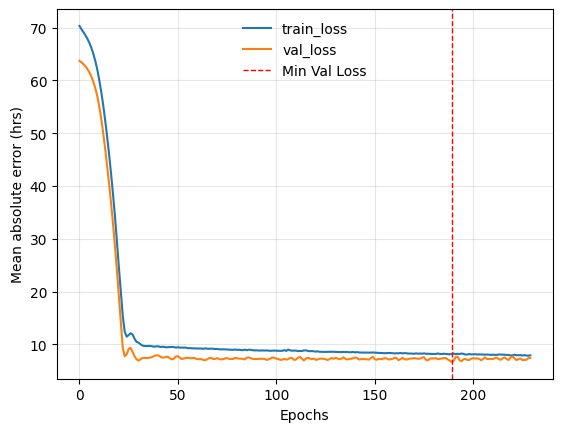

In [23]:
def plot_history(history):
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Mean absolute error (hrs)')
  plt.legend(frameon=0)
  plt.grid(True, alpha=0.3)

  # Find the minimum validation loss epoch
  min_val_loss_epoch = np.argmin(history.history['val_loss'])
  min_val_loss = history.history['val_loss'][min_val_loss_epoch]

  # Draw a vertical dashed line at the minimum validation loss epoch
  plt.axvline(x=min_val_loss_epoch, color='r', linestyle='dashed', linewidth=1, label='Min Val Loss')
  plt.legend(frameon=0)

  plt.show()
display = plot_history(history)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Expansion-speed/halo_data1/save_models')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Expansion-speed/halo_data1/test_data.xlsx', sheet_name='Sheet1')
# df.drop(columns=['Unnamed: 12', 'Tann3.1', 'Tann3A.1'], axis=1, inplace=True)
df.head()

,CME_date/Time,Shock_date/Time,Vmax,AW,Vlat,Vblk,Vfrt,Tobs
0,2009-12-16,2009-12-19,430,360,201,259,200,77.50
1,2013-06-23,2013-06-27,450,174,228,230,109,88.03
2,2014-09-10,2014-09-12,720,360,1789,465,125,45.88
3,2015-04-05,2015-04-09,390,157,506,221,179,84.98
4,2017-07-14,2017-07-16,620,360,1420,300,400,52.56


In [ ]:
x_test = df[df.columns[2:-1]].values
y_test = y = df[df.columns[-1]].values.reshape(-1,1)

scale = StandardScaler()
x_test= scale.fit_transform(x_test)

print(x_test[:5])

[[-0.92526222  0.63308533 -1.0984296  -0.38468442 -0.67157142]
 [-0.73264257 -1.70861099 -1.04696624 -0.58491759 -1.30958932]
 [ 1.86772262  0.63308533  1.92837838  1.03766156 -1.19741035]
 [-1.31050151 -1.92263699 -0.51708423 -0.64705892 -0.81880632]
 [ 0.9046244   0.63308533  1.2250458  -0.10159614  0.7306657 ]]


In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Expansion-speed/halo_data1/save_models/my_model3')

In [ ]:
load_model.summary()

Model: "sequential_350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense_1400 (Dense)          (None, 84)                504       
                                                                 
 dropout_1050 (Dropout)      (None, 84)                0         
                                                                 
 dense_1401 (Dense)          (None, 84)                7140      
                                                                 
 dropout_1051 (Dropout)      (None, 84)                0         
                                                                 
 dense_1402 (Dense)          (None, 84)                7140      
                                                    

In [ ]:
# #importing module
import sklearn
from sklearn.metrics import r2_score

# Evaluating the model

tf.random.set_seed(500000)
y_pred = load_model.predict(x_test)
print('R score is :', r2_score(y_test, y_pred))
print('mean absolute error =', np.mean(np.abs(y_pred-y_test)))

1/1 [==============================] - 0s 56ms/step
R score is : 0.8327078109336066
mean absolute error = 4.736812193734305


In [ ]:
print([y_pred])
print()
print([y_test])

[array([[80.480705],
       [88.99659 ],
       [39.79619 ],
       [88.11776 ],
       [49.98506 ],
       [79.98261 ],
       [90.767166],
       [63.016254],
       [70.091675],
       [80.49778 ],
       [89.338684],
       [72.14996 ],
       [90.66499 ],
       [65.32989 ],
       [79.85245 ],
       [60.712532],
       [54.78746 ],
       [55.310303],
       [80.73268 ],
       [37.822166],
       [57.761948],
       [66.13795 ],
       [46.98733 ],
       [49.54086 ],
       [53.01902 ],
       [66.252846],
       [59.110294],
       [56.149914]], dtype=float32)]

[array([[ 77.5 ],
       [ 88.03],
       [ 45.88],
       [ 84.98],
       [ 52.56],
       [ 96.6 ],
       [107.2 ],
       [ 62.6 ],
       [ 66.62],
       [ 72.93],
       [ 90.43],
       [ 67.23],
       [ 80.42],
       [ 70.9 ],
       [ 79.  ],
       [ 63.98],
       [ 62.4 ],
       [ 54.  ],
       [ 78.5 ],
       [ 38.6 ],
       [ 57.25],
       [ 63.  ],
       [ 47.43],
       [ 47.63],
       [ 59.